1. 삼성전자 주식 다음날 가격 얼마일까? (회귀)
2. 비트코인 다음날 어떻게 될까? (회귀)
3. 비트코인 상승하면 다음날 주가와의 상관관계 (correlation)

1. 목표
   1. Y : 미래 30일의 국내 특정 주식과 비트코인의 종가
   1. X : 최근 60일간의 데이터
      1. step : 하루 간격
      1. 양 : 1 년치(2018년 6월~2019년 6월)
1. 데이터 획득
   1. 국내 기업 1개, 비트코인 1개
1. 데이터 정제
   1. 누락
1. 데이터 전처리
   1. 특수기호, 문자→수치 변환
   1. 두 데이터 날짜 기준으로 통합(axis=1)
      1. 외국(2018-01-01), 국내(2018.1.1, 18.1.1)
      1. 날짜 포맷을 (YYYY-MM-DD)로 변환 후 통합
   
1. 비트코인 가격 변화와 주가와의 상관관계(correlation)  
   1. cov()
1. 입력X / 출력y 분리
   1. m개의 X,y 쌍
   1. X(m, 60, 10~15 (국내증시컬럼 + 비트코인컬럼 )  → reshape → (m, 60 *15)
      왜냐면, 2차원만 인식할 수 있어서....
   1. Y(m, 30, 2)  → reshape → (m, 30 * 2)
1. 학습용/검증용(test) 분리
   1. 섞으면 안되므로 직접 분리
   1. 가장 과거의 데이터 10%를 검증용으로 사용
1. 모델 선정
   1. Ridge 모델, 학습용 데이터로 학습
   1. 성능 측정
1. 그래프로 시각화
   1. 과거
   1. 미래의 예측 predict X(1, 60*15)  → return  → y_hat(1, 30 * 2)
      1. 미래 예측(1, 30 * 2) → (30,2)  > 국내(30), 비트코인(30) > 그래프로 그리기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#주소중간에 _day가 추가됩니다.
samsung_url = 'https://finance.naver.com/item/sise_day.nhn?code=005930'

In [3]:
tables = pd.read_html(samsung_url+'&page='+str(1))
len(tables)

2

In [4]:
#몇번째 테이블이 일일데이터일까 찾기
for t in tables:
    print(t.shape)

(15, 7)
(1, 12)


In [5]:
# 첫번째 테이블(15, 7) 로 유추 가능!!!
samsung = tables[0]
samsung.shape

(15, 7)

In [6]:
samsungs = []
for i in range(1,28):
    tables = pd.read_html(samsung_url+'&page='+str(i))
    samsung = tables[0]
    samsungs.append(samsung)
len(samsungs)

27

In [7]:
samsung = pd.concat(samsungs, axis=0)
samsung.shape

(405, 7)

In [8]:
samsung.tail()

,날짜,종가,전일비,시가,고가,저가,거래량
10,2018.05.31,50700.0,1200.0,50400.0,50800.0,49850.0,63491109.0
11,2018.05.30,49500.0,1800.0,51300.0,51500.0,49100.0,20498098.0
12,2018.05.29,51300.0,1000.0,52200.0,52500.0,51300.0,8480437.0
13,2018.05.28,52300.0,400.0,52500.0,53000.0,52000.0,9787820.0
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
bitcoin_url = 'https://coinmarketcap.com/currencies/bitcoin/historical-data/'
bitcoin_url +='?start=20180601&end=20190601'
tables = pd.read_html(bitcoin_url)
bitcoin = tables[0]
len(tables)

2

In [13]:
bitcoin.head()

,Date,Open*,High,Low,Close**,Volume,Market Cap
0,"Jun 01, 2019",8573.84,8625.60,8481.58,8564.02,22488303544,151890214310
1,"May 31, 2019",8320.29,8586.66,8172.55,8574.50,25365190957,152059886414
2,"May 30, 2019",8661.76,9008.31,8221.27,8319.47,29246528551,147525141134
3,"May 29, 2019",8718.59,8755.85,8482.73,8659.49,23473479966,153537047655
4,"May 28, 2019",8802.76,8807.02,8634.72,8719.96,24226919267,154590202287


# 테이터 통합
 - 두 데이터 날짜 기준으로 통합(axis=1)
 - 외국(2018-01-01), 국내(2018.1.1, 18,1,1)
 - 날짜 포맷을 (YYYY-MM-DD)으로 변환 후 통합

In [16]:
samsung.head(2)

,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019.07.03,45750.0,500.0,45750.0,46350.0,45600.0,3560549.0


In [17]:
bitcoin.head(2)

,Date,Open*,High,Low,Close**,Volume,Market Cap
0,"Jun 01, 2019",8573.84,8625.60,8481.58,8564.02,22488303544,151890214310
1,"May 31, 2019",8320.29,8586.66,8172.55,8574.50,25365190957,152059886414


In [18]:
#날짜를 인덱스로
samsung = samsung.set_index('날짜')
bitcoin = bitcoin.set_index('Date')

In [19]:
# 인덱스 타입이 object
pd.to_datetime(samsung.index)  # 삼성전자의 인덱스를 날짜로 바꾸기

DatetimeIndex([       'NaT', '2019-07-03', '2019-07-02', '2019-07-01',
               '2019-06-28', '2019-06-27',        'NaT',        'NaT',
                      'NaT', '2019-06-26',
               ...
               '2018-06-04',        'NaT',        'NaT',        'NaT',
               '2018-06-01', '2018-05-31', '2018-05-30', '2018-05-29',
               '2018-05-28',        'NaT'],
              dtype='datetime64[ns]', name='날짜', length=405, freq=None)

In [20]:
pd.to_datetime(bitcoin.index)  # 비트코인의 인덱스를 날짜로 바꾸기

DatetimeIndex(['2019-06-01', '2019-05-31', '2019-05-30', '2019-05-29',
               '2019-05-28', '2019-05-27', '2019-05-26', '2019-05-25',
               '2019-05-24', '2019-05-23',
               ...
               '2018-06-10', '2018-06-09', '2018-06-08', '2018-06-07',
               '2018-06-06', '2018-06-05', '2018-06-04', '2018-06-03',
               '2018-06-02', '2018-06-01'],
              dtype='datetime64[ns]', name='Date', length=366, freq=None)

In [21]:
# 인덱스 타입을 날짜 타입으로 변환
samsung.index = pd.to_datetime(samsung.index) 
bitcoin.index = pd.to_datetime(bitcoin.index)

In [24]:
# 둘을 합치고, NaN 삭제
df = pd.concat((samsung,bitcoin), axis=1).dropna()
df

,종가,전일비,시가,고가,저가,거래량,Open*,High,Low,Close**,Volume,Market Cap
2018-06-01,51300.0,600.0,50500.0,51700.0,49950.0,13038499.0,7500.70,7604.73,7407.34,7541.45,4.921460e+09,1.287259e+11
2018-06-04,51100.0,200.0,50800.0,51200.0,50700.0,9767171.0,7722.53,7753.82,7474.04,7514.47,4.993170e+09,1.283122e+11
2018-06-05,51300.0,200.0,51100.0,51400.0,50400.0,9144100.0,7500.90,7643.23,7397.00,7633.76,4.961740e+09,1.303659e+11
2018-06-07,50600.0,700.0,51800.0,51800.0,50500.0,13590016.0,7650.82,7741.27,7650.82,7678.24,4.485800e+09,1.311532e+11
2018-06-08,49650.0,950.0,50200.0,50400.0,49600.0,16951706.0,7685.14,7698.19,7558.40,7624.92,4.227580e+09,1.302562e+11
2018-06-11,49900.0,250.0,49750.0,50300.0,49350.0,10571312.0,6799.29,6910.18,6706.63,6906.92,4.745270e+09,1.180259e+11
2018-06-12,49400.0,500.0,49700.0,49800.0,49250.0,12110569.0,6905.82,6907.96,6542.08,6582.36,4.654380e+09,1.124919e+11
2018-06-14,48200.0,1200.0,49000.0,49000.0,48200.0,20971729.0,6342.75,6707.14,6334.46,6675.35,5.138710e+09,1.141060e+11
2018-06-15,47650.0,550.0,48500.0,48700.0,47650.0,17080892.0,6674.08,6681.08,6433.87,6456.58,3.955390e+09,1.103787e+11
2018-06-18,46600.0,1050.0,47600.0,47650.0,46200.0,16661870.0,6510.07,6781.14,6446.68,6734.82,4.039200e+09,1.151762e+11


In [25]:
df.dtypes

종가            float64
전일비           float64
시가            float64
고가            float64
저가            float64
거래량           float64
Open*         float64
High          float64
Low           float64
Close**       float64
Volume        float64
Market Cap    float64
dtype: object

In [27]:
df.describe()   # 누락이 있는지 통계치로 확인!!

,종가,전일비,시가,고가,저가,거래량,Open*,High,Low,Close**,Volume,Market Cap
count,244.000000,244.000000,244.000000,244.000000,244.000000,2.440000e+02,244.000000,244.000000,244.000000,244.000000,2.440000e+02,2.440000e+02
mean,44541.393443,524.590164,44541.393443,44982.786885,44080.122951,1.127346e+07,5598.614672,5708.022869,5487.953197,5597.538361,8.087400e+09,9.730654e+10
std,2616.501077,445.496251,2663.568359,2616.332608,2605.084532,3.923683e+06,1514.608753,1542.730010,1476.931675,1512.541132,6.225952e+09,2.597773e+10
min,37450.000000,0.000000,37450.000000,37600.000000,36850.000000,4.762460e+06,3253.120000,3329.560000,3206.540000,3242.480000,3.230550e+09,5.649438e+10
25%,43012.500000,200.000000,43012.500000,43437.500000,42400.000000,8.298381e+06,3957.602500,4031.850000,3899.502500,3956.197500,4.324805e+09,6.936442e+10
50%,44975.000000,400.000000,44925.000000,45500.000000,44500.000000,1.079669e+07,6205.425000,6300.355000,6029.725000,6179.620000,5.304537e+09,1.064328e+11
75%,46362.500000,762.500000,46462.500000,46850.000000,46000.000000,1.305694e+07,6599.830000,6743.025000,6498.092500,6601.707500,9.347169e+09,1.140496e+11
max,51300.000000,2200.000000,51800.000000,51800.000000,50700.000000,2.625465e+07,8802.760000,9008.310000,8668.700000,8805.780000,3.316720e+10,1.560938e+11


In [30]:
df.isna().sum().sum()  # Nan 확인!!

0

In [32]:
df.cov() #상관관계

,종가,전일비,시가,고가,저가,거래량,Open*,High,Low,Close**,Volume,Market Cap
종가,6.846078e+06,-1.755498e+04,6.807220e+06,6.780417e+06,6.748902e+06,-1.768174e+09,1.509873e+06,1.509372e+06,1.519761e+06,1.530810e+06,-1.766514e+12,2.530176e+13
전일비,-1.755498e+04,1.984669e+05,-1.146445e+04,2.638181e+04,-4.971497e+04,8.561799e+08,-1.569126e+04,-2.158713e+04,-1.742792e+04,-2.561715e+04,-1.813583e+11,-4.628508e+11
시가,6.807220e+06,-1.146445e+04,7.094596e+06,6.898380e+06,6.874931e+06,-1.543646e+09,1.544614e+06,1.544355e+06,1.547371e+06,1.560183e+06,-1.646136e+12,2.579749e+13
고가,6.780417e+06,2.638181e+04,6.898380e+06,6.845196e+06,6.757650e+06,-1.307755e+09,1.532320e+06,1.531849e+06,1.541699e+06,1.551951e+06,-1.657222e+12,2.567207e+13
저가,6.748902e+06,-4.971497e+04,6.874931e+06,6.757650e+06,6.786465e+06,-1.902252e+09,1.518191e+06,1.521359e+06,1.524395e+06,1.540312e+06,-1.758229e+12,2.544846e+13
거래량,-1.768174e+09,8.561799e+08,-1.543646e+09,-1.307755e+09,-1.902252e+09,1.539529e+13,-6.895658e+08,-7.620610e+08,-6.713624e+08,-7.452021e+08,8.860541e+14,-1.248894e+16
Open*,1.509873e+06,-1.569126e+04,1.544614e+06,1.532320e+06,1.518191e+06,-6.895658e+08,2.294040e+06,2.326722e+06,2.226557e+06,2.271367e+06,1.577697e+12,3.895097e+13
High,1.509372e+06,-2.158713e+04,1.544355e+06,1.531849e+06,1.521359e+06,-7.620610e+08,2.326722e+06,2.380016e+06,2.264298e+06,2.324452e+06,1.850203e+12,3.988235e+13
Low,1.519761e+06,-1.742792e+04,1.547371e+06,1.541699e+06,1.524395e+06,-6.713624e+08,2.226557e+06,2.264298e+06,2.181327e+06,2.226544e+06,1.453797e+12,3.818191e+13
Close**,1.530810e+06,-2.561715e+04,1.560183e+06,1.551951e+06,1.540312e+06,-7.452021e+08,2.271367e+06,2.324452e+06,2.226544e+06,2.287781e+06,1.706507e+12,3.925147e+13


In [33]:
# 전날 비트ㅗ인 상승하면 다음날 주가와의 상관관계(correlation)

In [39]:
비트코인변화 = df['Open*'] - df['Close**']
주가변화 = df['시가'] - df['종가']
과거비트코인변화 = 비트코인변화.iloc[:-1]
다음날주가변화 = 주가변화.iloc[1:]

In [40]:
np.corrcoef(과거비트코인변화, 다음날주가변화)
#상관계수가 o에 가까우므로 둘은 상관관계가 거의 없습니다.

array([[ 1.        , -0.07316871],
       [-0.07316871,  1.        ]])

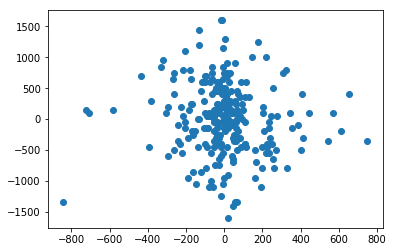

In [41]:
p = plt.scatter(과거비트코인변화, 다음날주가변화)

1. 입력X / 출력y 분리
   1. m개의 X,y 쌍
   1. X(m, 60, 10~15 (국내증시컬럼 + 비트코인컬럼 )  → reshape → (m, 60 *15)
      왜냐면, 2차원만 인식할 수 있어서....
   1. Y(m, 30, 2)  → reshape → (m, 30 * 2)

In [42]:
len(df)
input_seq = 60
output_seq = 30
m = len(df) - (input_seq + output_seq) +1
len(df), m

(244, 155)

In [95]:
# df/df.sum() df정규화
df = (df-df.min())/(df.max()-df.min())  #min, max 정규화
y_list = []
for i in range(m):
    X = df.iloc[i:i+input_seq]
    y = df.iloc[i+input_seq:i+input_seq+output_seq][['종가', 'Close**']]
    ##print(X.shape, y.shape)  ## 정상 발췌되는지 검토
    X_list.append(X)
    y_list.append(y)

In [96]:
len(X_list), len(y_list)
#numpy array 로 변환
x_3d = np.stack(X_list, axis=0)
y_3d = np.stack(y_list, axis=0)
x_3d.shape, y_3d.shape

((155, 60, 12), (155, 30, 2))

In [97]:
test_ratio = 0.1
test_m = int(len(x_3d)*test_ratio)
test_m

15

In [98]:
m = len(x_3d)
x_2d = np.reshape(x_3d, [m,-1])
y_2d = np.reshape(y_3d, [m,-1])
x_test = x_2d[:test_m]
x_train = x_2d[test_m:]
y_test = y_2d[:test_m]
y_train = y_2d[test_m:]

In [99]:
#model, Linear Regression, 가중치를 작게 제약시킨다. → 모든 정보를 활용해서 예측
from sklearn.linear_model import Ridge
model = Ridge(normalize=True, solver='lsqr').fit(x_train,y_train)   # 학습시 차원은 2차원이어야 함...→ 앞에서 미리 변환필요

In [100]:
model.score(x_train, y_train), model.score(x_test, y_test)  # 과적합 발생

(0.9767361862972054, -14.854996557273719)

In [101]:
korea_close_index = 0
bitcoin_close_index = 9

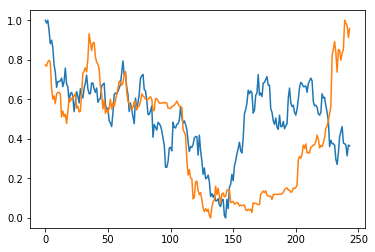

In [102]:
plt.plot(df['종가'].values)
plt.plot(df['Close**'].values)
## df['종가'].plot()    # 가로축이 날짜로 나옴..
## df ['Close**'].plot() # 가로축이 날짜로 나옴..

In [103]:
#가장 최근 데이터
recent = df.iloc[-input_seq:]
recent = np.reshape(np.array(recent), [1,-1])
recent.shape

(1, 720)

In [104]:
p = model.predict(recent)
p = np.reshape(p, [output_seq, -1])
p.shape

(30, 2)

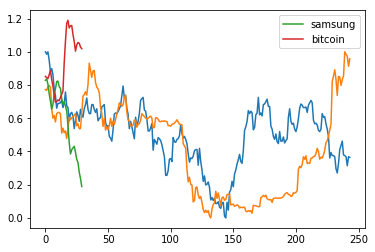

In [105]:
plt.plot(df['종가'].values)
plt.plot(df['Close**'].values)
plt.plot(p[:,0], label = 'samsung')
plt.plot(p[:,1], label = 'bitcoin')
plt.legend()

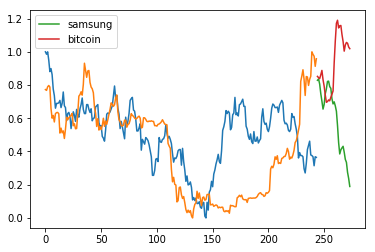

In [106]:
# 위치를 옮기고 싶다..
xm = len(df)

plt.plot(np.arange(xm), df['종가'].values)
plt.plot(np.arange(xm), df['Close**'].values)
plt.plot(np.arange(xm, xm+output_seq), p[:,0], label = 'samsung')
plt.plot(np.arange(xm, xm+output_seq), p[:,1], label = 'bitcoin')
plt.legend()
